## Market Score

In [1]:
import pandas as pd
import numpy as np

### 함수

In [2]:
# market score구하기, 이동평균으로 구한다.
def MarketScore(kospi):
    ma1 = pd.Series(kospi["Close"].rolling(window=10).mean(), index=kospi.index)
    ma2 = pd.Series(kospi["Close"].rolling(window=20).mean(), index=kospi.index)
    ma3 = pd.Series(kospi["Close"].rolling(window=30).mean(), index=kospi.index)
    ma4 = pd.Series(kospi["Close"].rolling(window=40).mean(), index=kospi.index)
    ma5 = pd.Series(kospi["Close"].rolling(window=50).mean(), index=kospi.index)
    ma6 = pd.Series(kospi["Close"].rolling(window=60).mean(), index=kospi.index)
    
    score = (np.where(KOSPI["Close"]>ma1,1,0) \
            + np.where(KOSPI["Close"]>ma2,1,0) \
            + np.where(KOSPI["Close"]>ma3,1,0) \
            + np.where(KOSPI["Close"]>ma4,1,0) \
            + np.where(KOSPI["Close"]>ma5,1,0) \
            + np.where(KOSPI["Close"]>ma6,1,0)) \
            / 6  #ma 6개 평균
    return score

### Main

### csv 파일 읽어오기

In [3]:
df = pd.read_csv("kospi_daily_total_data.csv")

In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
10484,2019-01-14,2070.67,2073.94,2059.93,2064.52,432890000.0
10485,2019-01-15,2069.14,2097.22,2067.58,2097.18,439488000.0
10486,2019-01-16,2100.17,2106.22,2099.16,2106.10,500078000.0
10487,2019-01-17,2110.14,2117.23,2101.70,2107.06,475884000.0
10488,2019-01-18,2116.10,2124.28,2113.71,2124.28,558397000.0


In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1980-01-04,100.00,100.00,100.00,100.00,NaN
1,1980-01-05,100.15,100.15,100.15,100.15,NaN
2,1980-01-07,102.53,102.53,102.53,102.53,NaN
3,1980-01-08,105.28,105.28,105.28,105.28,NaN
4,1980-01-09,106.37,106.37,106.37,106.37,NaN


In [6]:
df.index = pd.to_datetime(df["Date"])
KOSPI = df["Close"]
#KOSPI.rename("KOSPI", inplace=True)
KOSPI = pd.DataFrame(KOSPI,index=df.index)
KOSPI.head()

,Close
Date,
1980-01-04,100.00
1980-01-05,100.15
1980-01-07,102.53
1980-01-08,105.28
1980-01-09,106.37


In [7]:
### Market Score구하기
MScore = MarketScore(KOSPI)
KOSPI["MarketScore"] = pd.Series(MScore,index=KOSPI.index)
#KOSPI["MS6"] = pd.Series(KOSPI["MarketScore"].rolling(window=6).mean(), index=KOSPI.index)
#KOSPI["MS3"] = pd.Series(KOSPI["MarketScore"].rolling(window=3).mean(), index=KOSPI.index)
KOSPI["MS20"] = pd.Series(KOSPI["MarketScore"].rolling(window=20).mean(), index=KOSPI.index)

In [8]:
KOSPI["ma60"] = pd.Series(KOSPI["Close"].rolling(window=60).mean(), index=KOSPI.index)

### 구간 데이타 구하기

In [13]:
#data = KOSPI["2017":"2018"]
#data = KOSPI["2017"]
#data = KOSPI["2018"]
data = KOSPI["2015":"2016"]

### KOSPI & Market Score 그래프그리기

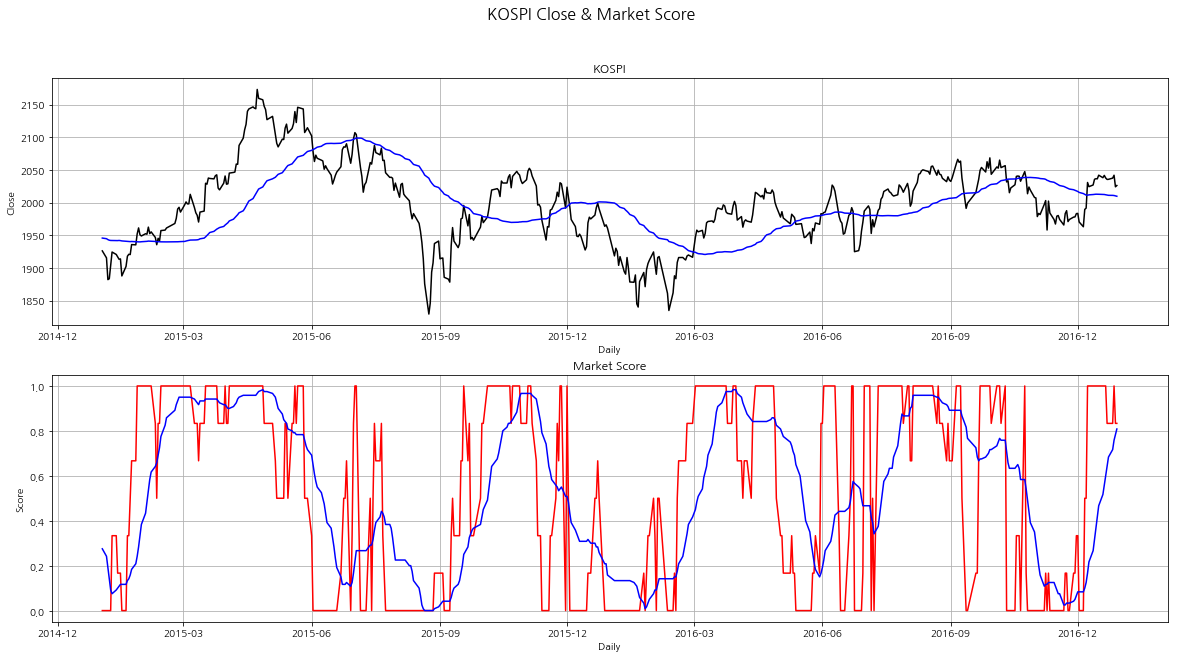

In [14]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib import rc, font_manager
rc("font", family="NanumGothic")

%matplotlib inline

fig, axs = plt.subplots(2, 1,figsize=(20,10))
axs[0].plot(data["Close"], color="Black")
axs[0].plot(data["ma60"], color="Blue")
axs[0].set_title('KOSPI')
axs[0].set_xlabel('Daily')
axs[0].set_ylabel('Close')
axs[0].grid(True)
fig.suptitle('KOSPI Close & Market Score', fontsize=16)

index = [0.1,0.5,1.0]
#axs[1].bar(data.index, data["MarketScore"],color="Red")
axs[1].plot(data["MarketScore"],color="Red")
axs[1].plot(data["MS20"],color="Blue")
axs[1].set_xlabel('Daily')
axs[1].set_title('Market Score')
axs[1].set_ylabel('Score')
axs[1].grid(True)
